Легенда: 
(IW) величина сварочного тока ;
(IF) ток фокусировки электронного пучка ;
(VW) скорость сварки;
(FP) расстояние от поверхности образцов до электронно-оптической системы. 
Глубина шва (Depth) и ширина шва (Width)

Постановка задачи: провести прогнозирование глубины (Depth) и ширины (Width) сварного шва  в зависимости от параметров технологического процесса (IW, IF, VW, FP)  

План: 
1. Провести разведочный анализ данных 
2. Применить простые алгоритмы ML
3. Применить алгоритм Нейросети
4. Оценить эффективность методов на основании одного из критериев 
5. Выбрать оптимальный метод решения задачи

# Разведочный анализ данных

In [1]:
# импорт библиотек для разведочного анализа данных, физуализации и подготовки для дальнейшего исследования
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
ebw_data = pd.read_csv('/home/andrey/Документы/МГТУ им Баумана/Итоговая аттестация/Датасет по 3 кейсу/ebw_data.csv')

In [3]:
ebw_data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [4]:
ebw_data.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [5]:
ebw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


Выводы: 
пропуски данных отсутствуют. Все данные представлены числами (целыми, либо вещественными);

In [6]:
ebw_data["Depth"].value_counts()

1.20    14
1.08     6
1.36     6
1.24     5
1.28     4
1.12     3
0.80     3
0.84     3
1.32     3
1.16     3
1.00     2
0.96     2
1.64     2
0.98     1
0.86     1
1.68     1
1.58     1
1.18     1
1.22     1
1.76     1
0.88     1
1.40     1
1.72     1
1.02     1
0.94     1
0.92     1
1.62     1
1.04     1
1.60     1
Name: Depth, dtype: int64

In [7]:
ebw_data["Width"].value_counts()

1.76    12
1.80     8
2.48     5
1.96     4
1.72     4
1.86     4
1.84     4
1.82     4
2.00     3
2.52     3
1.78     3
2.24     2
2.28     2
1.68     2
1.94     2
2.08     1
2.04     1
2.54     1
2.16     1
1.71     1
2.50     1
1.90     1
2.56     1
2.60     1
1.88     1
Name: Width, dtype: int64

Значение целевых переменных представляют собой множества значений, в т.ч. уникальных
Вывод: для прогнозирования целевых переменных не подходят методы классификации. Будем пробовать методы регрессии

<AxesSubplot:>

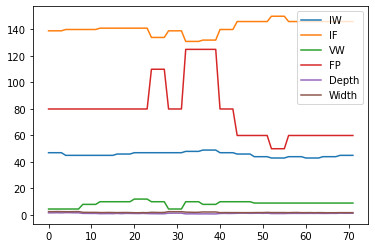

In [8]:
ebw_data.plot()

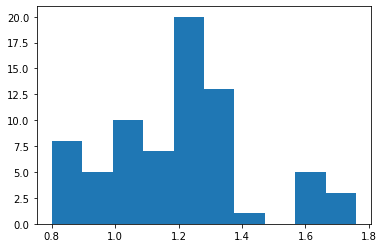

In [9]:
plt.hist(ebw_data["Depth"]);

(array([19., 23.,  4.,  8.,  1.,  1.,  4.,  0.,  6.,  6.]),
 array([1.68 , 1.772, 1.864, 1.956, 2.048, 2.14 , 2.232, 2.324, 2.416,
        2.508, 2.6  ]),
 <BarContainer object of 10 artists>)

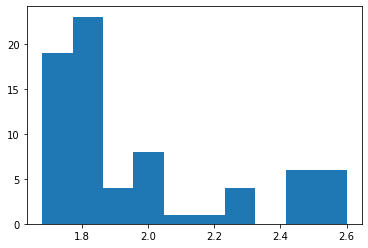

In [10]:
plt.hist(ebw_data["Width"])

Целевые переменные не подчиняются закону нормального распределения

<module 'matplotlib.pyplot' from '/root/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

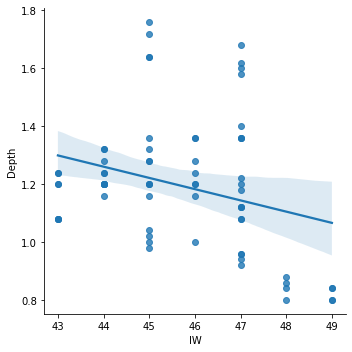

In [11]:
sns.lmplot(data = ebw_data, x = 'IW', y = 'Depth')
plt

зависимость глубины шва от величины сварочного тока не просматривается

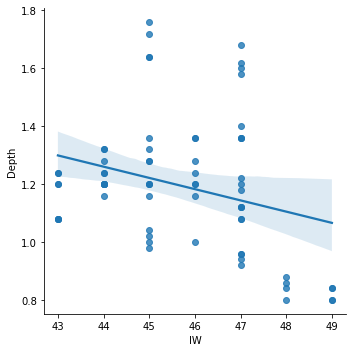

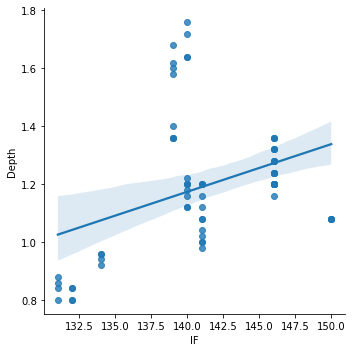

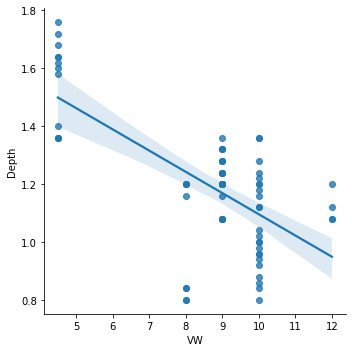

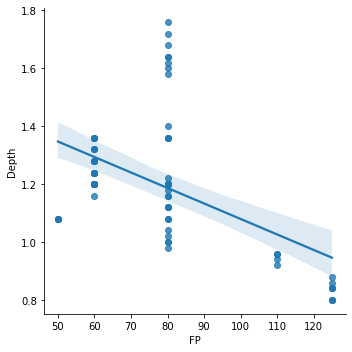

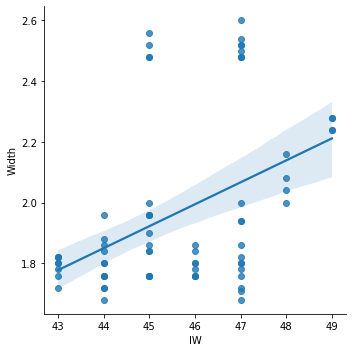

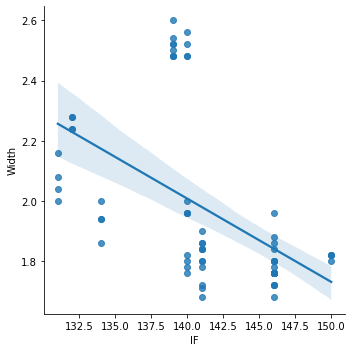

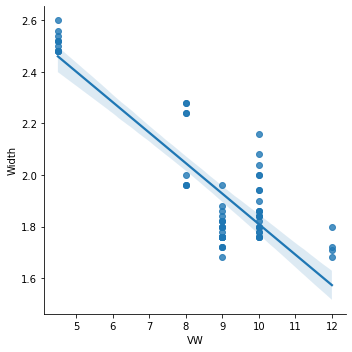

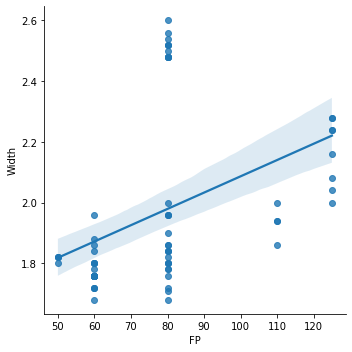

In [12]:
# ищем наглядные зависимости
X_names = ("IW", "IF", "VW", "FP")
y_names = ('Depth', 'Width')
for i in y_names:
    for j in X_names:
        sns.lmplot(data = ebw_data, x = j, y = i)
        plt

Наглядные зависимости не просматриваются

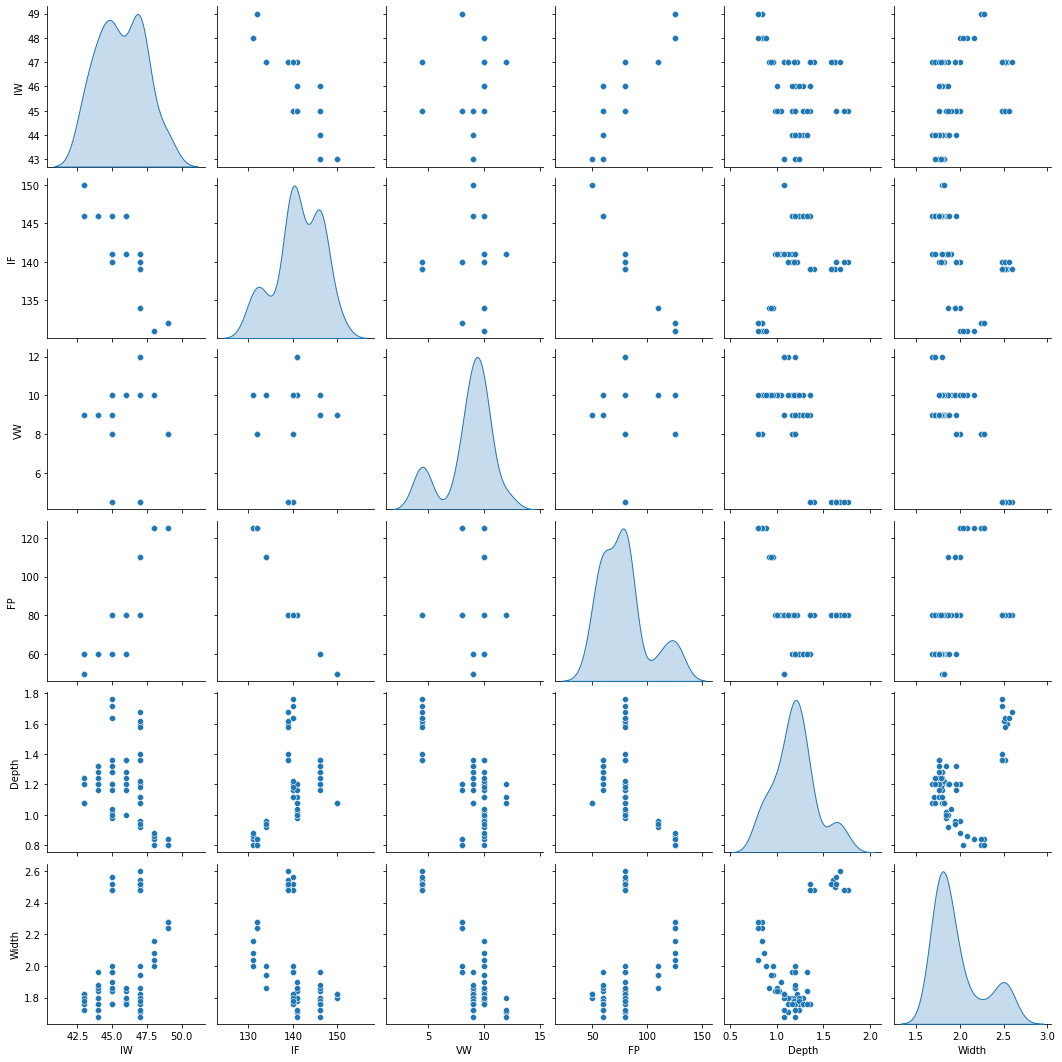

In [13]:
sns.pairplot(ebw_data, diag_kind='kde')

In [14]:
# нормализуем
minmax_scaler = MinMaxScaler()
dataset_norm = minmax_scaler.fit_transform(np.array(ebw_data[["IW", "IF", "VW", "FP", 'Depth', 'Width']]))

In [15]:
dataset_norm[0]

array([0.66666667, 0.42105263, 0.        , 0.4       , 0.83333333,
       0.93478261])

In [16]:
# возвращаем название столбцов (преобразование обратно в дата.фрейм)
dataset_norm_df = pd.DataFrame(data = dataset_norm, columns = ["IW", "IF", "VW", "FP", 'Depth', 'Width'])

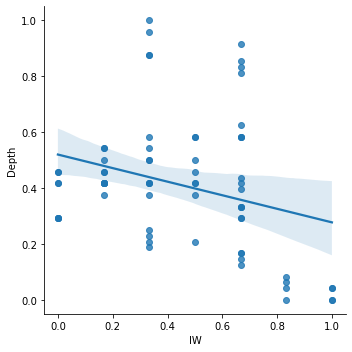

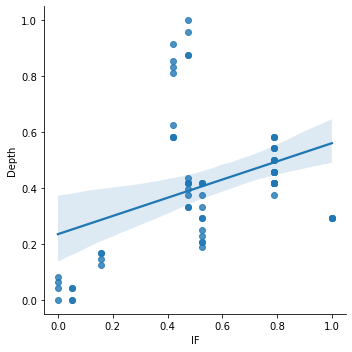

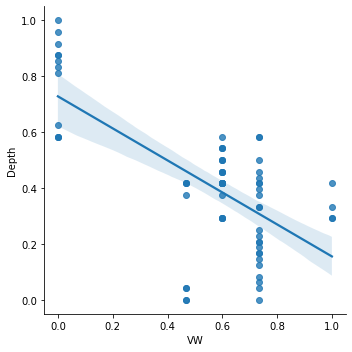

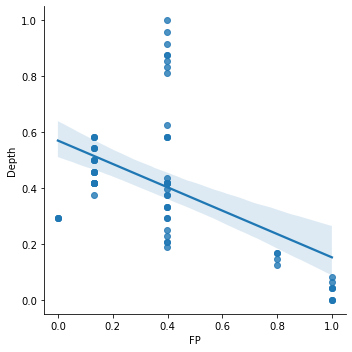

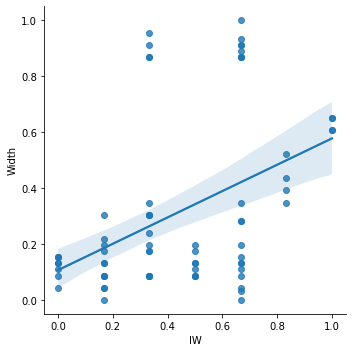

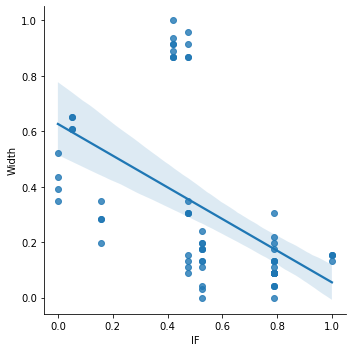

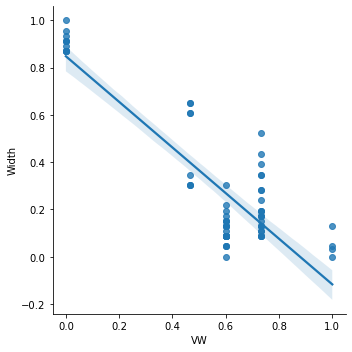

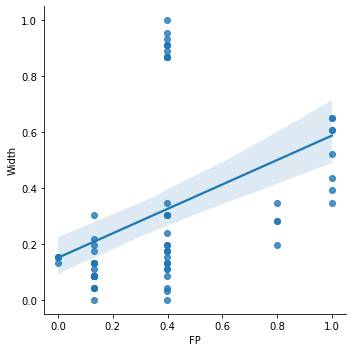

In [17]:
for i in y_names:
    for j in X_names:
        sns.lmplot(data = dataset_norm_df, x = j, y = i)
        plt

In [18]:
# стандартизуем
std_scaler = StandardScaler()
dataset_std = std_scaler.fit_transform(np.array(ebw_data[["IW", "IF", "VW", "FP", 'Depth', 'Width']]))

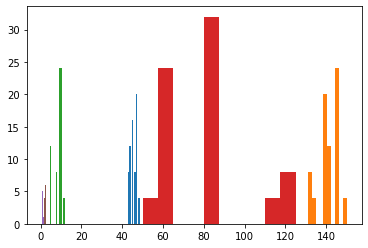

In [19]:
Xy_names = ("IW", "IF", "VW", "FP", 'Depth', 'Width')
for i in Xy_names:
    plt.hist(ebw_data[i])

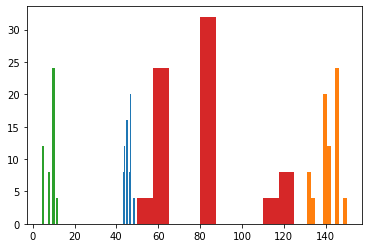

In [20]:
for i in X_names:
    plt.hist(ebw_data[i])

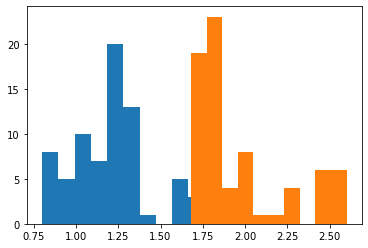

In [21]:
for i in y_names:
    plt.hist(ebw_data[i])

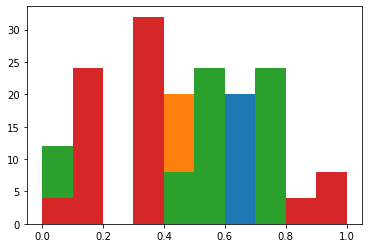

In [22]:
for i in X_names:
    plt.hist(dataset_norm_df[i])

In [23]:
dataset_norm_df.corr() # посмотрим корреляционную матрицу  на нормализованном датасэте

,IW,IF,VW,FP,Depth,Width
IW,1.000000,-0.861073,-0.043430,0.835530,-0.289568,0.434869
IF,-0.861073,1.000000,0.115093,-0.980562,0.376084,-0.510167
VW,-0.043430,0.115093,1.000000,-0.001060,-0.671437,-0.874257
FP,0.835530,-0.980562,-0.001060,1.000000,-0.510748,0.412962
Depth,-0.289568,0.376084,-0.671437,-0.510748,1.000000,0.425391
Width,0.434869,-0.510167,-0.874257,0.412962,0.425391,1.000000


Вывод #1: просматривается наиболее устойчивая сязь (в виде обратной корреляции) между целевым параметром Width и VW (-0.87), а также между целевым параметром Depth и VW (-0.67).

Вывод #2: ввиду специфики данных (отсутствие нормального распределения, целевые переменные представлены множеством значений, отсутствие линейных зависимостей, отсутствие временного характера данных) для дальнейшего анализ представляется возможным использовать алгоритмы регрессионного анализа (не линейного), которые не требуют нормализации / стандартизации данных


# "Простые" алгоритмы ML

## Решающие деревья

Для пробы применим алгоритм классификацц "Decision tree"

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import graphviz 

In [25]:
X_raw = ebw_data[["IW", "IF", "VW", "FP"]]
y_depth_raw = ebw_data['Depth']
y_width_raw = ebw_data['Width']

In [26]:
X_raw.shape

(72, 4)

In [27]:
y_depth_raw.shape

(72,)

In [28]:
# clf = tree.DecisionTreeClassifier(criterion = 'entropy')
# clf.fit(X_raw, y_depth_raw) 

# при обучении классификатора ожидаемо появляется ошибка.  
# Применяем  DecisionTreeRegressor 

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
rgrsr = DecisionTreeRegressor()

In [31]:
rgrsr.fit(X_raw, y_depth_raw) 

DecisionTreeRegressor()

In [32]:
rgrsr.score(X_raw, y_depth_raw)

0.9327212968912173

[Text(0.2604166666666667, 0.9285714285714286, 'VW <= 6.25\nsquared_error = 0.05\nsamples = 72\nvalue = 1.196'),
 Text(0.08333333333333333, 0.7857142857142857, 'IF <= 139.5\nsquared_error = 0.02\nsamples = 12\nvalue = 1.56'),
 Text(0.041666666666666664, 0.6428571428571429, 'squared_error = 0.016\nsamples = 8\nvalue = 1.495'),
 Text(0.125, 0.6428571428571429, 'squared_error = 0.003\nsamples = 4\nvalue = 1.69'),
 Text(0.4375, 0.7857142857142857, 'IF <= 137.0\nsquared_error = 0.024\nsamples = 60\nvalue = 1.123'),
 Text(0.20833333333333334, 0.6428571428571429, 'IW <= 47.5\nsquared_error = 0.003\nsamples = 12\nvalue = 0.87'),
 Text(0.16666666666666666, 0.5, 'squared_error = 0.0\nsamples = 4\nvalue = 0.945'),
 Text(0.25, 0.5, 'VW <= 9.0\nsquared_error = 0.001\nsamples = 8\nvalue = 0.832'),
 Text(0.20833333333333334, 0.35714285714285715, 'squared_error = 0.0\nsamples = 4\nvalue = 0.82'),
 Text(0.2916666666666667, 0.35714285714285715, 'squared_error = 0.001\nsamples = 4\nvalue = 0.845'),
 Text(

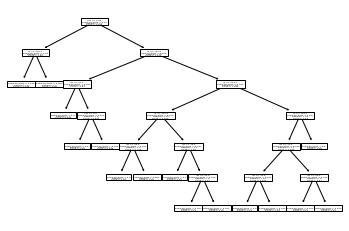

In [33]:
plot_tree(rgrsr, feature_names = X_raw.columns)  # что-то получилось :) 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_depth_raw, test_size=0.33, random_state=42)

In [36]:
X_test.shape

(24, 4)

In [37]:
X_train.shape

(48, 4)

In [38]:
y_test.shape

(24,)

In [39]:
y_train.shape

(48,)

получилось корректно разделить выборку на train и test

In [40]:
rgrsr.fit(X_train, y_train) 

DecisionTreeRegressor()

In [41]:
rgrsr.score(X_train, y_train)

0.9404877592973276

In [42]:
rgrsr.score(X_test, y_test)

0.8874500185116624

Применим тот же алгоритм для оценки предсказания параметра Width

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_width_raw, test_size=0.33, random_state=42)

In [44]:
rgrsr.fit(X_train, y_train)  

DecisionTreeRegressor()

In [45]:
rgrsr.score(X_train, y_train)   # в методе score для оценки эффективности используется коэффициент детерминации r^2

0.9737731299957955

In [46]:
rgrsr.score(X_test, y_test)

0.9583251268536819

Регрессия Decision Tree работает !

Вывод #3: с помощью алгоритма DecisionTreeRegressor предсказать параметр Depth удаётся с точностью до 0.8874500185116624, параметр Width удаётся с точностью до 0.9583251268536819 (Оценка точности предсказания дана методом score() ) 

(Промежуточный результат: точность предсказания увеличилась по сравнению с корреляционным анализом. Коэффициенты корреляции: Depth и VW (-0.67), Width и VW (-0.87) - предполагают существенно большую вероятность ошибки).

## Батарея методов регрессий

In [47]:
# Применим к нашей задаче методы: 
# наименьших квадратов, ближайших соседей, опорных векторов, дерево решений 
# и выберем оптимальный

# Импорт необходимых дополнительных библиотек
from pandas import DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 

from sklearn.metrics import mean_squared_error, r2_score  #эти методы будем использовать для оценки эффективности моделей

In [48]:
models = [LinearRegression(), # метод наименьших квадратов
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
         DecisionTreeRegressor() # дерево, 
         ]

In [49]:
y_2targets = ebw_data[['Depth', 'Width']].values
X = ebw_data[["IW", "IF", "VW", "FP"]].values

In [50]:
print(X.shape, y_2targets.shape)

(72, 4) (72, 2)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2targets, test_size=0.3, random_state = 42)

In [52]:
# X_train, X_test, y_train_depth, y_test_depth = train_test_split(X, y_depth, test_size=0.4)

In [53]:
# Выполним проверку корректности разделения выборок:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50, 4) (22, 4) (50, 2) (22, 2)


In [54]:
TestModels = pd.DataFrame()
tmp = {}  # словарь для сохранения оценок эффективности моделей
j = [0,1]

#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')] 
    for i in j: 
        model.fit(X_train, y_train[:, i]) 
        #вычисляем r2_score и MSE
        tmp['R2_Y%s'%str(i + 1)] = r2_score(y_test[:,i], model.predict(X_test))
        tmp['MSE%s'%str(i + 1)] = mean_squared_error(y_test[:, i], model.predict(X_test))
    #записываем данные в итоговый DataFrame
    TestModels = TestModels.append([tmp])
    #делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

/tmp/.private/root/ipykernel_24577/933075497.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/tmp/.private/root/ipykernel_24577/933075497.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/tmp/.private/root/ipykernel_24577/933075497.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
/tmp/.private/root/ipykernel_24577/933075497.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])


In [55]:
print(TestModels)

                          R2_Y1      MSE1     R2_Y2      MSE2
Model                                                        
LinearRegression       0.697671  0.017277  0.955878  0.003766
KNeighborsRegressor    0.793595  0.011795  0.961371  0.003298
SVR                    0.707847  0.016696  0.960056  0.003410
DecisionTreeRegressor  0.879949  0.006861  0.976931  0.001969


<AxesSubplot:title={'center':'MSE_Width'}, xlabel='Model'>

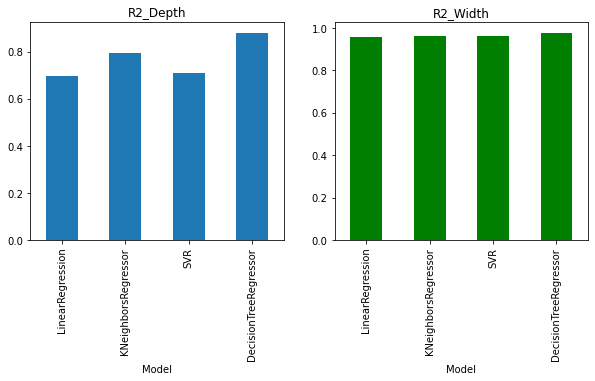

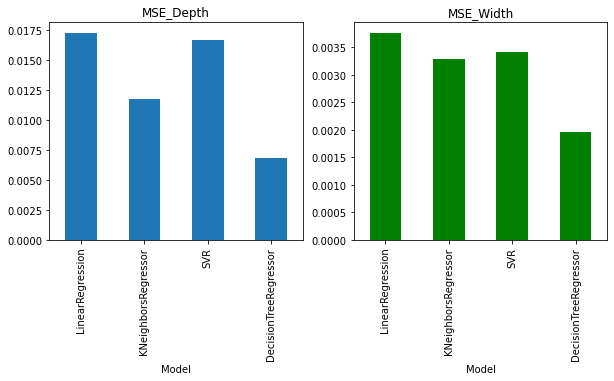

In [56]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Depth')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Width')

fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.MSE1.plot(ax=axes[0], kind='bar', title='MSE_Depth')
TestModels.MSE2.plot(ax=axes[1], kind='bar', color='green', title='MSE_Width')


Метод оценки среднеквадратической ошибки показывает наибольшую эффективность алгоритма DecisionTreeRegressor (0.006861 для прогноза целевой переменной Depth и 0.001969 для Width). 
Метод r2_score показывает существенное преимущество использования алгоритма DecisionTreeRegressor для предсказания параметра Depth (0.879949)   и незначимое преимущество этого же алгоритма для предсказания параметра Width (0.976931)

In [57]:
# попробуем найти процент ошибок при помощи MAPE
from sklearn.metrics import mean_absolute_percentage_error

In [58]:
print("Количество ошибок для предсказания: ")
for model in models: 
    MAPE_for_Depth = mean_absolute_percentage_error(y_test[:,0], model.predict(X_test))
    MAPE_for_Width = mean_absolute_percentage_error(y_test[:,1], model.predict(X_test))
    print(model, ": ")
    print('                         ', 'Depth = ', MAPE_for_Depth, '   ', 'Width = ', MAPE_for_Width)

Количество ошибок для предсказания: 
LinearRegression() : 
                          Depth =  0.6808591642878682     Width =  0.025019015019450783
KNeighborsRegressor(n_neighbors=6) : 
                          Depth =  0.685739144031835     Width =  0.021621965352394083
SVR(kernel='linear') : 
                          Depth =  0.6894489875307774     Width =  0.02328927748602395
DecisionTreeRegressor() : 
                          Depth =  0.6938899371727224     Width =  0.018463949684007216


При предсказании целевой переменной Width с помощью алгоритма DecisionTreeRegression количество ошибок составляет менее 2% 

Предсказания Depth получаются с ошибкой более 69% 


  Вывод #4: среди рассмотренных алгоритмов для данной задачи наиболее точные прогнозы можно построить при помощи алгоритма DecisionTreeRegression 
  
  Комментарий: высокий процент ошибок, полученных при помощи алгоритма MAPE требует дальнейшего изучения. Отдельным исследованием необходимо проверить гипотезу, что столь высокий процент ошибок получен в связи с очень маленькой тестовой выборкой 

# Нейросеть

Импортируем библиотеки необходимые для построения нейросети и визуализации результатов

In [59]:
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

2022-12-01 22:12:17.653249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 22:12:17.804731: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-01 22:12:17.807879: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-01 22:12:17.807892: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [60]:
def get_model_ns(n_inputs, n_outputs):
    model_ns = Sequential()
    model_ns.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model_ns.add(Dense(n_outputs))
    model_ns.compile(loss='mae', optimizer='adam')
    return model_ns

## построим модель для предсказания сразу двух параметров

In [61]:
model_ns = get_model_ns(4, 2)  # 4 нейрона на входе тк 4 признака, 2 на выходе: предсказываем и Depth и Width

2022-12-01 22:12:18.746766: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-01 22:12:18.746789: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-01 22:12:18.746803: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c3ulno8qinw66): /proc/driver/nvidia/version does not exist
2022-12-01 22:12:18.747062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [62]:
model_ns.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


In [63]:
hist = model_ns.fit(X, y_2targets, verbose=0, epochs=1000)  ## применяем модель на всей выборке
# без нормализации

In [64]:
df = pd.DataFrame(hist.history)

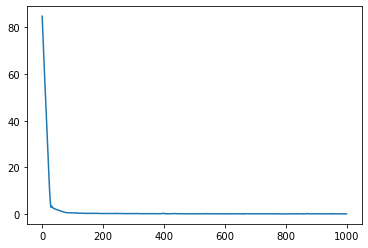

In [65]:
plt.plot(df)

In [66]:
prediction = model_ns.predict(X)

3/3 [==============================] - 0s 1ms/step


In [67]:
R2_for_NS = r2_score(y_2targets, model_ns.predict(X))
MSE_for_NS = mean_squared_error(y_2targets, model_ns(X))
MAPE_for_NS = mean_absolute_percentage_error(y_2targets, model_ns(X))

print('Значение R2_score:  = ', R2_for_NS)
print('Значение MSE: = ', MSE_for_NS)
print('Значение MAPE: = ', MAPE_for_NS)

3/3 [==============================] - 0s 1ms/step
Значение R2_score:  =  0.5843178639120921
Значение MSE: =  0.022290453371702327
Значение MAPE: =  0.09269987769331077


отдельно для train и test выборки

In [68]:
hist = model_ns.fit(X_train, y_train, verbose=0, epochs=1000)  ## обучаем на train, проверяем на тестовой
# без нормализации

In [69]:
R2_for_NS = r2_score(y_test, model_ns.predict(X_test))
MSE_for_NS = mean_squared_error(y_test, model_ns(X_test))
MAPE_for_NS = mean_absolute_percentage_error(y_test, model_ns(X_test))

print('Значение R2_score:  = ', R2_for_NS)
print('Значение MSE: = ', MSE_for_NS)
print('Значение MAPE: = ', MAPE_for_NS)

1/1 [==============================] - 0s 15ms/step
Значение R2_score:  =  0.8043688123717017
Значение MSE: =  0.012370636770090595
Значение MAPE: =  0.05426921225411535


In [70]:
# запустим в НС нормированные данные 
dataset_norm.shape # вернёмся к нормализованному датасэту

(72, 6)

In [71]:
type(dataset_norm)

numpy.ndarray

In [72]:
yn_2 = dataset_norm[:, -2:]
Xn = dataset_norm[:, :4]

In [73]:
print(Xn.shape, yn_2.shape)

(72, 4) (72, 2)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(Xn, yn_2, test_size=0.3, random_state = 42) 
# разделим на тренировочную и тестовую выборку с теми же параметрами

In [75]:
hist = model_ns.fit(X_train, y_train, verbose=0, epochs=1000)  ## обучаем на train, проверяем на тестовой
# с нормализацией

In [76]:
R2_for_NS = r2_score(y_test, model_ns.predict(X_test))
MSE_for_NS = mean_squared_error(y_test, model_ns(X_test))
MAPE_for_NS = mean_absolute_percentage_error(y_test, model_ns(X_test))

print('Значение R2_score:  = ', R2_for_NS)
print('Значение MSE: = ', MSE_for_NS)
print('Значение MAPE: = ', MAPE_for_NS)

1/1 [==============================] - 0s 14ms/step
Значение R2_score:  =  0.8175505571379429
Значение MSE: =  0.012006827954094681
Значение MAPE: =  28625786205277.35


Значения R2_score и MSE существенно улучшились (0.821 и 0.012 против 0.702 и 0.021 на ненормализованной выборке).
Метрика MAPE показывает аномальные значения. Применимость MAPE для данной задачи под сомнением. 
PS Цифры взяты при одном из запусков модели. При повторных запусках, значения меняются. Нет воспроизводимости

Вывод #5 Нейросеть для оценки сразу двух целевых параметров на нормализованных данных демонстрирует довольно  хорошие результаты, в то же время, работа алгоритма DecisionTree - эффективнее 

Для корректного сравнения эффективности метода с другими, использованными нами алгоритмами ML, необходимо построить модели для предсказания каждого параметра в отдельности. Для итоговой нейросети будем использовать только нормализованные данные

## Нейросеть для предсказания отдельно "Depth" и "Width"

In [81]:
model_ns = get_model_ns(4, 1)  #4 нейрона на входе тк 4 признака, 1 на выходе: только Depth или только Width

In [82]:
for i in j: 
    model_ns.fit(X_train, y_train[:, i])
    
    R2_for_NS = r2_score(y_test[:,i], model_ns.predict(X_test))
    MSE_for_NS = mean_squared_error(y_test[:,i], model_ns.predict(X_test))
    MAPE_for_NS = mean_absolute_percentage_error(y_test[:,i], model_ns.predict(X_test))
    print('Значение R2_score для: ',  y_names[i], " = ", R2_for_NS)
    print('Значение MSE для: ',  y_names[i], " = ", MSE_for_NS)
    print('Значение MAPE для: ',  y_names[i], " = ", MAPE_for_NS)

1/1 [==============================] - 0s 15ms/step
Значение R2_score для:  Depth  =  -5.305990683050142
Значение MSE для:  Depth  =  0.39102552850195066
Значение MAPE для:  Depth  =  103321453699818.64
1/1 [==============================] - 0s 15ms/step
Значение R2_score для:  Width  =  -6.26096289461527
Значение MSE для:  Width  =  0.7323182865989547
Значение MAPE для:  Width  =  5.231332533194965


Вывод #6 При оценке целевых параметров по-отдельности результаты аномально низкие. От запуска к запуску не наблюдается воспроизводимости

# Оценка эффективности моделей

ВЫВОД: Наибоболее эффективный алгоритм для решения задачи предсказания глубины и ширины сварного шва по технологическим параметрам - DecisionTreeRegressor